In [1]:
from hiive.mdptoolbox import mdp, example
import hiive
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
import json
import numpy as np


**Value Iteration**

In [21]:
def value_iteration(state_size=4, gamma=0.9, epsilon=0.001, plot=False):
    iterations = []
    times  = []
    rewards = []

    for _ in range(10):
        random_map = generate_random_map(size=state_size, p=0.9)
        P, R = example.openai("FrozenLake-v1", desc=random_map, is_slippery=True)

        vi = mdp.ValueIteration(P, R, gamma=gamma, epsilon = epsilon)
        stats = vi.run()
        iterations.append(vi.iter)
        times.append(vi.time)
        reward = [stat['Reward'] for stat in stats]
        rewards.append(reward)

    results = [sum(iterations)/len(iterations), max(iterations), min(iterations), 
               round(sum(times)/len(times), 4), round(max(times), 4), round(min(times), 4)]
#     print('mean iteration: ', sum(iterations)/len(iterations))
#     print('max iteration: ', max(iterations))
#     print('min iteration: ', min(iterations))

#     print('mean time: ', round(sum(times)/len(times), 4))
#     print('max time: ', round(max(times), 4))
#     print('min time: ', round(min(times), 4))

    if not plot:
        return results
    
    mean_list = []
    max_list = []
    min_list = []
    for i in range(40):

        acc = 0
        count = 0
        max_r = 0
        min_r = 10
        for r in rewards:

            if i < len(r):
                acc += r[i]
                count += 1
                if r[i] > max_r:
                    max_r = r[i]
                if r[i] < min_r:
                    min_r = r[i]
        if count == 0: continue
        mean_list.append(acc/count)
        max_list.append(max_r)
        min_list.append(min_r)

#     plt.figure()
    plt.plot(range(1, len(mean_list)+1), mean_list, 
             label=f"size {state_size}x{state_size}"
#             label=f"gamma={gamma}"
#             label=f"epsilon={epsilon}"
            )
    plt.fill_between(range(1, len(mean_list)+1), min_list, max_list, alpha=0.2)

    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title("Rewards vs Iterations in Value Iteration (Frozen Lake)")
    
    return results

Text(0.5, 1.0, 'Time vs Discount rate in Value Iteration (Frozen Lake)')

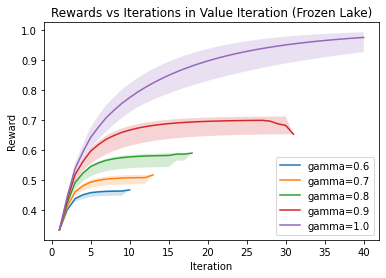

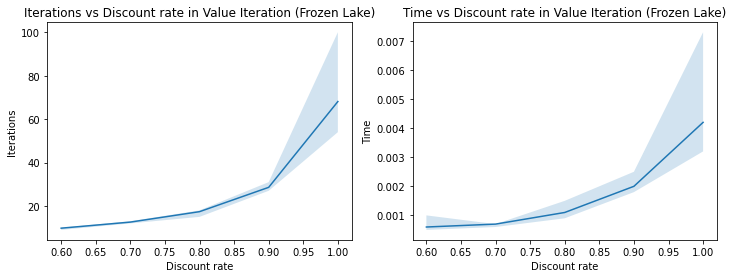

In [12]:
# Discount rate
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

gammas=[0.6, 0.7, 0.8, 0.9, 1.0]
for g in gammas:
    a, b, c, e, f, g = value_iteration(gamma=g, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(gammas, mean_iteration)
ax1.fill_between(gammas, min_iteration, max_iteration, alpha=0.2)
ax1.set_xlabel("Discount rate")
ax1.set_ylabel("Iterations")
plt.title("Iterations vs Discount rate in Value Iteration (Frozen Lake)")

ax2 = plt.subplot(122)
ax2.plot(gammas, mean_time)
ax2.fill_between(gammas, min_time, max_time, alpha=0.2)
ax2.set_xlabel("Discount rate")
ax2.set_ylabel("Time")
plt.title("Time vs Discount rate in Value Iteration (Frozen Lake)")

Text(0.5, 1.0, 'Time vs epsilon in Value Iteration (Frozen Lake)')

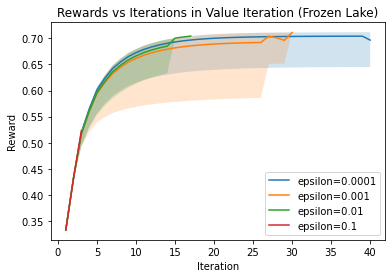

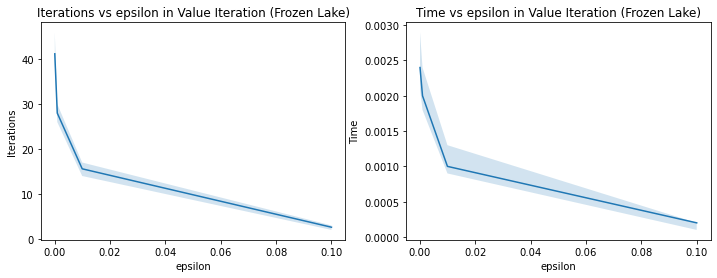

In [20]:
# epsilon
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

epsilon=[0.0001, 0.001, 0.01, 0.1]
for e in epsilon:
    a, b, c, e, f, g = value_iteration(epsilon=e, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(epsilon, mean_iteration)
ax1.fill_between(epsilon, min_iteration, max_iteration, alpha=0.2)
ax1.set_xlabel("epsilon")
ax1.set_ylabel("Iterations")
plt.title("Iterations vs epsilon in Value Iteration (Frozen Lake)")

ax2 = plt.subplot(122)
ax2.plot(epsilon, mean_time)
ax2.fill_between(epsilon, min_time, max_time, alpha=0.2)
ax2.set_xlabel("epsilon")
ax2.set_ylabel("Time")
plt.title("Time vs epsilon in Value Iteration (Frozen Lake)")

Text(0.5, 1.0, 'Time vs State Size in Value Iteration (Frozen Lake)')

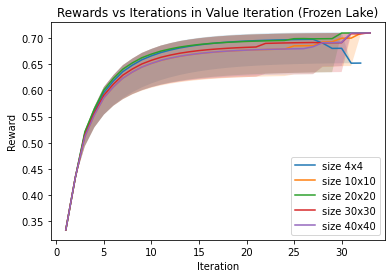

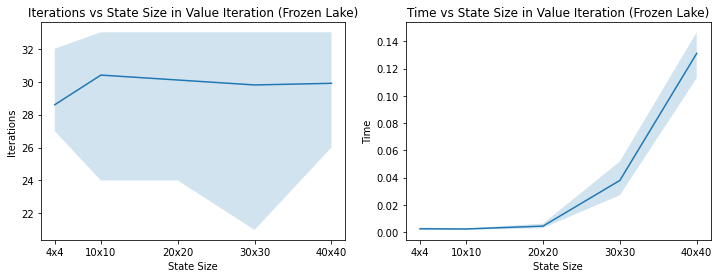

In [189]:
# state size
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

size=[4, 10, 20, 30, 40]
for s in size:
    a, b, c, e, f, g = value_iteration(state_size=s, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(size, mean_iteration)
ax1.fill_between(size, min_iteration, max_iteration, alpha=0.2)
ax1.set_xlabel("State Size")
ax1.set_ylabel("Iterations")
plt.xticks(size, [f'{s}x{s}' for s in size])
plt.title("Iterations vs State Size in Value Iteration (Frozen Lake)")

ax2 = plt.subplot(122)
ax2.plot(size, mean_time)
ax2.fill_between(size, min_time, max_time, alpha=0.2)
ax2.set_xlabel("State Size")
ax2.set_ylabel("Time")
plt.xticks(size, [f'{s}x{s}' for s in size])
plt.title("Time vs State Size in Value Iteration (Frozen Lake)")

**Policy Iteration**

In [52]:
def policy_iteration(state_size=4, gamma=0.9, plot=False):
    iterations = []
    times  = []
    rewards = []

    for _ in range(10):
        random_map = generate_random_map(size=state_size, p=0.9)
        P, R = example.openai("FrozenLake-v1", desc=random_map, is_slippery=True)

        vi = mdp.PolicyIteration(P, R, gamma=gamma, max_iter=8)
        stats = vi.run()
        iterations.append(vi.iter)
        times.append(vi.time)
        reward = [stat['Reward'] for stat in stats]
        rewards.append(reward)

    results = [sum(iterations)/len(iterations), max(iterations), min(iterations), 
               round(sum(times)/len(times), 4), round(max(times), 4), round(min(times), 4)]
#     print('mean iteration: ', sum(iterations)/len(iterations))
#     print('max iteration: ', max(iterations))
#     print('min iteration: ', min(iterations))

#     print('mean time: ', round(sum(times)/len(times), 4))
#     print('max time: ', round(max(times), 4))
#     print('min time: ', round(min(times), 4))

    if not plot:
        return results
    
    mean_list = []
    max_list = []
    min_list = []
    for i in range(40):

        acc = 0
        count = 0
        max_r = 0
        min_r = 10
        for r in rewards:

            if i < len(r):
                acc += r[i]
                count += 1
                if r[i] > max_r:
                    max_r = r[i]
                if r[i] < min_r:
                    min_r = r[i]
        if count == 0: continue
        mean_list.append(acc/count)
        max_list.append(max_r)
        min_list.append(min_r)

#     plt.figure()
    plt.plot(range(1, len(mean_list)+1), mean_list, 
             label=f"size {state_size}x{state_size}"
#             label=f"gamma={gamma}"
            )
    plt.fill_between(range(1, len(mean_list)+1), min_list, max_list, alpha=0.2)
#     plt.ylim(0,1)
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title("Rewards vs Iterations in Policy Iteration (Frozen Lake)")
    
    return results

# policy_iteration(plot=True)

0.6
0.7
0.8
0.9
0.99


Text(0.5, 1.0, 'Time vs Discount rate in Policy Iteration (Frozen Lake)')

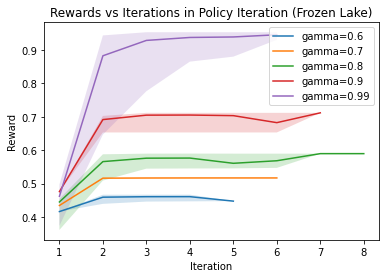

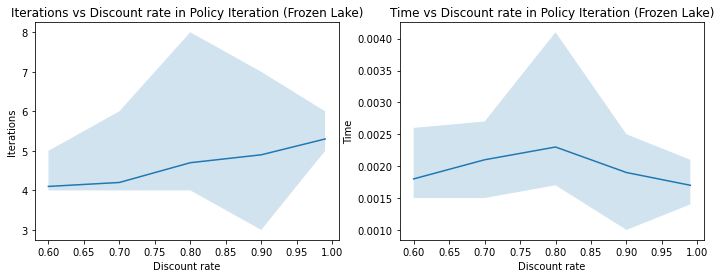

In [50]:
# Discount rate
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

gammas=[0.6, 0.7, 0.8, 0.9, 0.99]
for g in gammas:
    print(g)
    a, b, c, e, f, g = policy_iteration(gamma=g, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(gammas, mean_iteration)
ax1.fill_between(gammas, min_iteration, max_iteration, alpha=0.2)
ax1.set_xlabel("Discount rate")
ax1.set_ylabel("Iterations")
plt.title("Iterations vs Discount rate in Policy Iteration (Frozen Lake)")

ax2 = plt.subplot(122)
ax2.plot(gammas, mean_time)
ax2.fill_between(gammas, min_time, max_time, alpha=0.2)
ax2.set_xlabel("Discount rate")
ax2.set_ylabel("Time")
plt.title("Time vs Discount rate in Policy Iteration (Frozen Lake)")

Text(0.5, 1.0, 'Time vs State Size in Policy Iteration (Frozen Lake)')

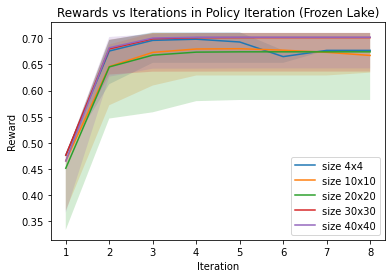

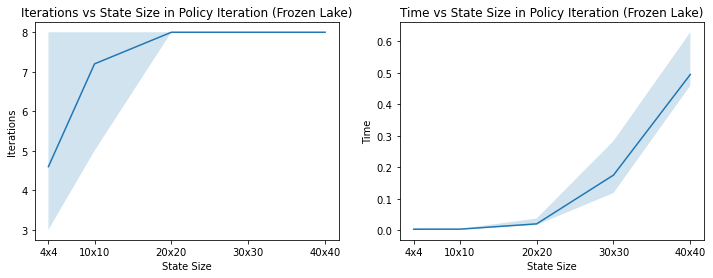

In [191]:
# state size
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

size=[4, 10, 20, 30, 40]
for s in size:
    a, b, c, e, f, g = policy_iteration(state_size=s, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(size, mean_iteration)
ax1.fill_between(size, min_iteration, max_iteration, alpha=0.2)
ax1.set_xlabel("State Size")
ax1.set_ylabel("Iterations")
plt.xticks(size, [f'{s}x{s}' for s in size])
plt.title("Iterations vs State Size in Policy Iteration (Frozen Lake)")

ax2 = plt.subplot(122)
ax2.plot(size, mean_time)
ax2.fill_between(size, min_time, max_time, alpha=0.2)
ax2.set_xlabel("State Size")
ax2.set_ylabel("Time")
plt.xticks(size, [f'{s}x{s}' for s in size])
plt.title("Time vs State Size in Policy Iteration (Frozen Lake)")

**Q Learning**

In [159]:
random_map = {
    '4': ['SFFF', 
          'FHFF', 
          'FFHF', 
          'FFFG'],
    '10': ['SFFHFFFHFF',
         'FFFFFFFFFF',
         'FFFFFFFFFF',
         'FFFFHHFFFH',
         'FFFFHFFFHF',
         'FFFFFFFHFF',
         'FFFFFFFFFF',
         'FFFFFFFFFF',
         'FFFFFFFFFF',
         'HFFFFHFFFG'],
    '20': ['SHHFHFFFFFFFFFFFFFFH',
         'FFFFFFHFFHFFFFFFFFFF',
         'FFFFFFFFFFHFFHFFFFFF',
         'FFFFFFFFFFFFFFFFFFFF',
         'HFFFFFFHFFFFHFFFFFFF',
         'FFFFFFFFFFFHFFFFFFFF',
         'FFFFFFFFFFFFHHFFFHFF',
         'FFFFFFFFFFFFFFFHFFFF',
         'FFFFFFHHFFFFFFFFFFFF',
         'FFFFFFFFFFFFFFFFFFFF',
         'FFFFFFFFFFFFFHFHFFFF',
         'FFFFFFFFFFFFFFFFFFFF',
         'FFFFHFFFFFFFFFFFFFFF',
         'FFFFFFFHFFFHFFFFFFFF',
         'FHHFFHHFFFFFFFFFFFFF',
         'FFFFHFFFFFFFFFFFHFFF',
         'FFHFHFHFFFFFFFHHFFFF',
         'FFFFFFFFFFFFFHFFFFFF',
         'FFFHFFFFFFFFFFFFFFFF',
         'FFFFFFFFFFFFFFFFFFFG']
}

In [193]:
P, R = example.openai("FrozenLake-v1", desc=random_map['4'], is_slippery=True)

ql = mdp.QLearning(P, R, 0.9, n_iter=5000000)
stats = ql.run()

ql.time


212.79471802711487

Text(0.5, 1.0, 'Average Q-value Function vs Iteration (Frozen Lake)')

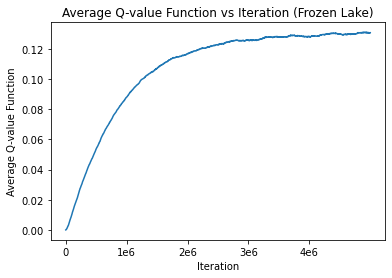

In [194]:
v = [s['Mean V'] for s in stats]
plt.plot(range(1, 5000001, 500), v)
plt.xticks(range(1, 5000001, 1000000), ['0', '1e6', '2e6', '3e6', '4e6'])
plt.ylabel('Average Q-value Function')
plt.xlabel('Iteration')
plt.title("Average Q-value Function vs Iteration (Frozen Lake)")

In [183]:
def map_discretize(the_map):
    size = len(the_map)
    dis_map = np.zeros((size, size, 3))
    for i, row in enumerate(the_map):
        for j, loc in enumerate(row):
            if loc == "S":
                dis_map[i, j] = [0.5, 0.8, 0.5]
            elif loc == "F":
                dis_map[i, j] = [0.5, 0.8, 0.9]
            elif loc == "H":
                dis_map[i, j] = [210/295, 230/295, 250/295]
            elif loc == "G":
                dis_map[i, j] = [240/295, 170/295, 70/295]
    return dis_map


def policy_numpy(policy):
    size = int(np.sqrt(len(policy)))
    pol = np.asarray(policy)
    pol = pol.reshape((size, size))
    return pol


def see_policy(policy, map_size=4):
    map_name = str(map_size)+"x"+str(map_size)
    data = map_discretize(random_map[str(map_size)])
    np_pol = policy_numpy(policy)
    plt.imshow(data)

    for i in range(np_pol[0].size):
        for j in range(np_pol[0].size):
            arrow = '\u2190'
            if np_pol[i, j] == 1:
                arrow = '\u2193'
            elif np_pol[i, j] == 2:
                arrow = '\u2192'
            elif np_pol[i, j] == 3:
                arrow = '\u2191'
            text = plt.text(j, i, arrow,
                           ha="center", va="center", color="w", fontsize=50/map_size + 10)
    plt.title('Value Iteration')
#     plt.title('Policy Iteration')
#     plt.title('Q-Learning')
    plt.show()


In [57]:

vi = mdp.ValueIteration(P, R, 0.9, epsilon=0.001)
stats = vi.run()
# print('Value Iteratiion Policy:  ', vi.policy)

pi = mdp.PolicyIteration(P, R, 0.9, max_iter=1000)
stats = pi.run()


Policy Iteratiion Policy:  (1, 3, 2, 2, 0, 0, 3, 2, 1, 0, 0, 2, 1, 1, 1, 0)


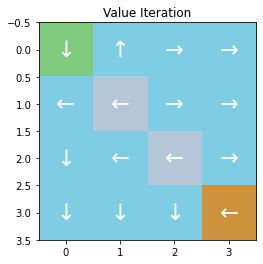

In [196]:
see_policy(vi.policy, 4)

In [160]:
P10, R10 = example.openai("FrozenLake-v1", desc=random_map['10'], is_slippery=True)
vi10 = mdp.ValueIteration(P10, R10, 0.9, epsilon=0.001)
stats = vi10.run()

pi10 = mdp.PolicyIteration(P10, R10, 0.9, max_iter=1000)
stats = pi10.run()


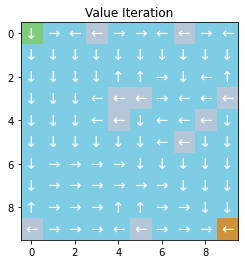

In [184]:
see_policy(vi10.policy, 10)